## Aula 08 - Redes neurais

In [125]:
import pandas as pd

cardio = pd.read_csv('./data/heart.csv')
# referencia: https://www.kaggle.com/ronitf/heart-disease-uci

In [126]:
cardio.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [127]:
from sklearn.model_selection import train_test_split

features = cardio.columns.tolist()
features.remove('target')

X = cardio[features]

y = cardio.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state=1) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(212, 13)
(212,)
(91, 13)
(91,)


### Regressão Logística no Scikit-Learn

In [128]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


c:\Users\natha\Desktop\FACENS\8 semestre\recpad\exercicios\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
y_pred = model.predict(X_test)

from sklearn.metrics import f1_score

f1_score(y_pred, y_test)

0.8269230769230769

In [130]:
for C in [-2,-1,0,1,2]:

  C = 10 ** C

  model = LogisticRegression(C=C, max_iter=500, random_state=2021)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  print(C, '->', f1_score(y_pred, y_test))

0.01 -> 0.7551020408163265
0.1 -> 0.8076923076923077
1 -> 0.8076923076923077


c:\Users\natha\Desktop\FACENS\8 semestre\recpad\exercicios\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\natha\Desktop\FACENS\8 semestre\recpad\exercicios\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

10 -> 0.8155339805825242
100 -> 0.8155339805825242


c:\Users\natha\Desktop\FACENS\8 semestre\recpad\exercicios\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Regressão logísticas com Keras

In [131]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization

import numpy as np
np.random.seed(1)
tf.random.set_seed(1)

In [132]:
normalizer = Normalization()
normalizer.adapt(X_train.values)

In [133]:
model = keras.Sequential([
    normalizer,
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (212, 13)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (112.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 27 (112.00 B)

In [134]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [135]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_split = 0.2,
    batch_size=10,
    verbose=0
    )

# verbose=0 não gera saida

In [136]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)


def plot_acc(history):
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)

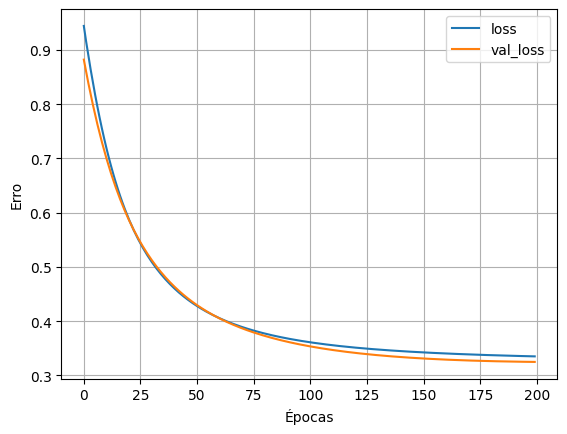

In [137]:
plot_loss(history)

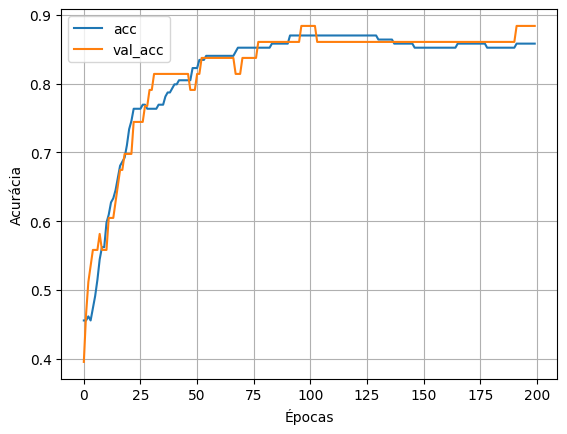

In [138]:
plot_acc(history)

In [139]:
y_pred = model.predict(X_test)

y_pred

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001D1BB6CBEC0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.00690874],
       [0.6766842 ],
       [0.11017777],
       [0.00897171],
       [0.05837627],
       [0.00617109],
       [0.0209434 ],
       [0.6756282 ],
       [0.00486028],
       [0.9912593 ],
       [0.20755614],
       [0.07220729],
       [0.8168335 ],
       [0.22937232],
       [0.31279752],
       [0.8938225 ],
       [0.98858804],
       [0.01088565],
       [0.58762455],
       [0.8029709 ],
       [0.9862435 ],
       [0.0321053 ],
       [0.6790748 ],
       [0.97702175],
       [0.9744925 ],
       [0.83056396],
       [0.00567925],
       [0.9741869 ],
       [0.9278965 ],
       [0.98356235],
       [0.9541339 ],
       [0.84400296],
       [0.7638886 ],
       [0.72207755],
       [0.07855852],
       [0.38689354],
       [0.18114734],
       [0.19545539],
       [0.63949203],
       [0.12215781],
       [0.93819284],
       [0.07994953],
       [0.24433847],
       [0.01027345],
       [0.72429144],
       [0.79958594],
       [0.3775311 ],
       [0.681

In [140]:
import numpy as np

f1_score(np.round(y_pred.reshape(-1)), y_test)

0.8076923076923077

In [141]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8003 - loss: 0.4147


[0.4314830005168915, 0.7802197933197021]

### Rede neural classificadora

In [142]:
# opcoes: adicionar camadas,
#         mudar o tamanho das camadas,
#         mudar a ativação das camadas,
#         inibir alguns neurônios (dropout)


model = keras.Sequential([
    normalizer,
    layers.Dense(10, activation='tanh'),
    
    layers.Dense(5, activation='tanh'),

    layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split = 0.2,
    batch_size=10,
    verbose=0
    )

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 13)             │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (112.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 27 (112.00 B)

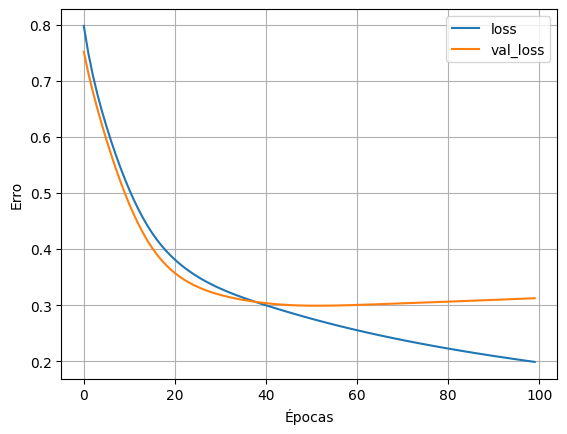

In [143]:
plot_loss(history)

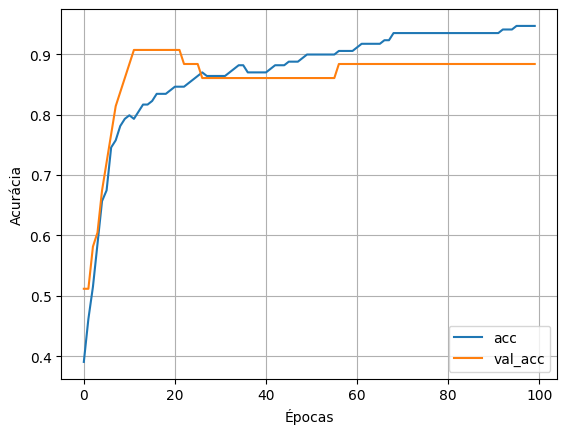

In [144]:
plot_acc(history)

In [145]:
y_pred = model.predict(X_test).reshape(-1)

from sklearn.metrics import accuracy_score

accuracy_score(np.round(y_pred), y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


0.8021978021978022

### Redes neurais regressoras

In [146]:
from sklearn.model_selection import train_test_split

features = cardio.columns.tolist()
features.remove('age')
features.remove('target')

X = cardio[features]

y = cardio.age

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(212, 12)
(212,)
(91, 12)
(91,)


In [147]:
normalizer = Normalization()
normalizer.adapt(X_train.values)

In [148]:
model = keras.Sequential([
    normalizer,
    layers.Dense(10),
    layers.Dense(7, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1)
])

model.summary()

model.compile(optimizer='adam',
              loss='mean_absolute_error')

history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split = 0.2,
    batch_size=8,
    verbose=0
    )

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (212, 12)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (104.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 25 (104.00 B)

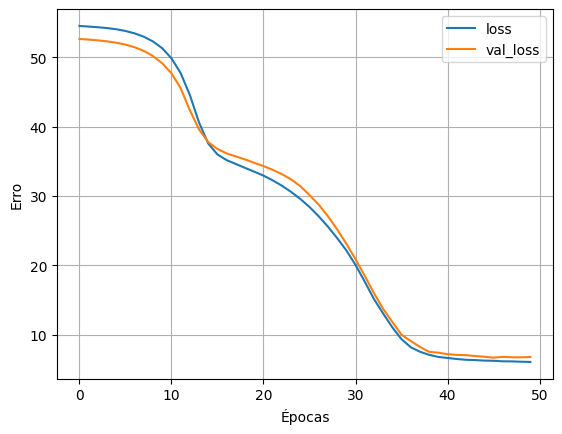

In [149]:
plot_loss(history)

In [150]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[63.73682  55.006622 58.430332 59.893375 63.478138 60.929386 61.031036
 52.334446 59.80705  54.20554  52.85601  63.402466 57.974445 57.184097
 59.93968  48.2642   49.18666  63.004883 52.03283  63.405716 57.06939
 59.51567  58.444855 52.984955 47.486637 49.40262  60.604767 45.755547
 56.365807 48.74819  46.517284 49.7071   56.355965 51.10271  61.1531
 46.504482 58.627625 53.359203 52.757126 65.39295  45.951187 59.91436
 50.179626 69.6008   51.49511  49.623516 56.002697 48.78422  51.9395
 64.04792  46.447525 56.592014 58.35515  55.772217 49.364025 50.452953
 58.299004 52.031036 48.714405 60.756927 57.99347  41.749092 52.640377
 56.13937  54.861294 49.70019  58.34951  56.78808  61.06482  56.699055
 62.364243 50.809967 66.18566  52.49109  60.636467 67.08708  55.267815
 61.00681  58.53556  51.288734 50.70729  50.027794 67.002975 48.674526
 54.36946  59.19289  66.355965 61.95206  48.87947  51.70054  59.597275]


In [151]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6626


6.483796119689941

In [152]:
y_test.mean()

55.043956043956044

In [153]:
y_pred.mean()

55.696735

: 